# Solving Ordinary Differential Equations (ODEs) in Python

Source: Scipy's [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

`odeint(model,y0,t,args=(...))`

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

## Exponential decays

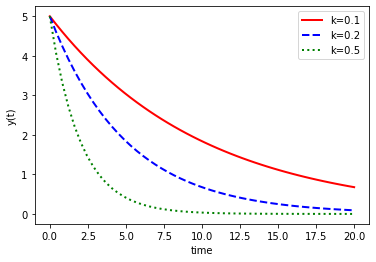

In [2]:
# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0, 20)

# solve ODEs
y1 = odeint(model,y0,t,args=(0.1,))
y2 = odeint(model,y0,t,args=(0.2,))
y3 = odeint(model,y0,t,args=(0.5,))

# plot results
plt.figure()
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()

## Hodgkin-Huxley electrophysiology model

Text(0, 0.5, 'Gating variables')

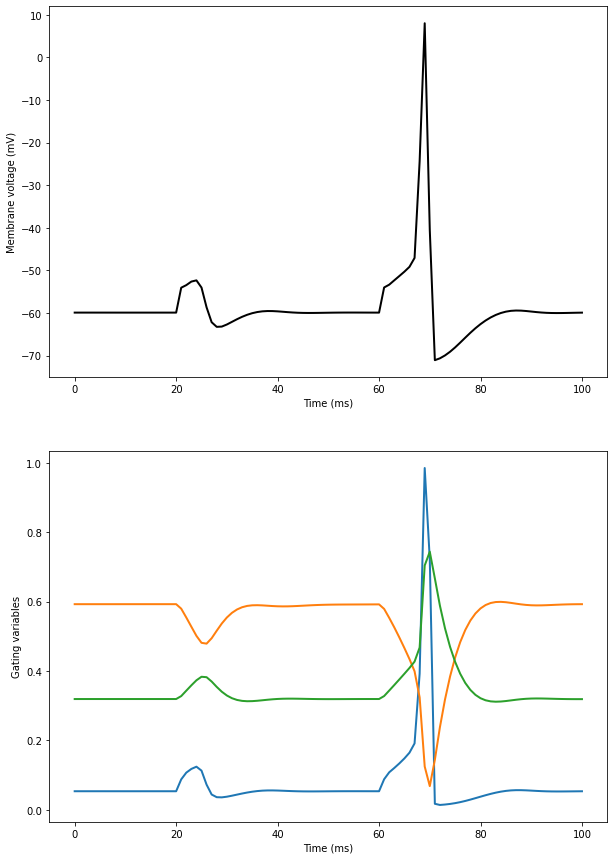

In [3]:
"""
Hodgkin-Huxley model of excitable barnacle muscle fiber
reviewed in Rinzel (1990) Bulletin of Mathematical Biology 52 pp. 5-23.
"""
from math import exp, expm1

def get_iStim(t):
    if 20 < t <= 21:
        return -6.80
    elif 60 < t <= 61:
        return -6.86
    else:
        return 0

# Model
def hh_rhs(y, t, p):
    # Constants
    E_N = p['E_N']  # Reversal potential of Na
    E_K = p['E_K']  # Reversal potential of K
    E_LEAK = p['E_LEAK']  # Reversal potential of leaky channels
    G_N_BAR = p['G_N_BAR']  # Max. Na channel conductance
    G_K_BAR = p['G_K_BAR'] # Max. K channel conductance
    G_LEAK = p['G_LEAK']  # Max. leak channel conductance
    C_M = p['C_M']  # membrane capacitance

    # Equations
    v, m, h, n = y

    mAlfaV = -0.10 * (v + 35)
    mAlfa = mAlfaV / expm1(mAlfaV)
    mBeta = 4.0 * exp(-(v + 60) / 18.0)
    dm = -(mAlfa + mBeta) * m + mAlfa
    
    hAlfa = 0.07 * exp(-(v+60)/20)
    hBeta = 1 / (exp(-(v+30)/10) + 1)
    dh  = -(hAlfa + hBeta) * h + hAlfa
    
    iNa = G_N_BAR * (v - E_N) * (m**3) * h

    nAlfaV = -0.1 * (v+50)
    nAlfa = 0.1 * nAlfaV / expm1(nAlfaV)
    nBeta = 0.125 * exp( -(v+60) / 80)
    dn  = -(nAlfa + nBeta) * n + nAlfa
    
    iK = G_K_BAR * (v - E_K) * (n**4)
    iLeak = G_LEAK * (v - E_LEAK)
    iSt = get_iStim(t)
    dv = -(iNa + iK + iLeak + iSt) / C_M
    return [dv, dm, dh, dn]

# Initial conditions
y0 = v, m, h, n = -59.8977, 0.0536, 0.5925, 0.3192

# Parameters
p = {'E_N': 55,     # Reversal potential of Na
     'E_K': -72,    # Reversal potential of K
     'E_LEAK': -49, # Reversal potential of leaky channels
     'G_N_BAR': 120,# Max. Na channel conductance
     'G_K_BAR': 36, # Max. K channel conductance
     'G_LEAK': 0.3, # Max. leak channel conductance
     'C_M': 1.0}    # membrane capacitance

# time span
tStart, tEnd = 0, 100
N_POINTS = 100+1
ts = np.linspace(tStart, tEnd, N_POINTS)

# Solve the ODEs
sol = odeint(hh_rhs, y0, ts, args=(p,), tcrit=[20, 21, 60, 61])

# Plotting
fig, axs = plt.subplots(nrows=2, figsize=(10, 15))
axs[0].plot(ts, sol[:, 0], 'k-', linewidth=2)
axs[0].set_xlabel("Time (ms)")
axs[0].set_ylabel("Membrane voltage (mV)")
axs[1].plot(ts, sol[:, 1:], linewidth=2, label=["m", "h", "n"])
axs[1].set_xlabel("Time (ms)")
axs[1].set_ylabel("Gating variables")